<img src="imagens/md-logo.jpg" width="96" height="96" align="left"/>

# Clustering

<font color=blue><b> Bootcamp Minerando Dados</b></font><br>
www.minerandodados.com.br

<img src="imagens/clusters.png" width="300" height="300" align="left"/>

** Importando bibliotecas **

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric

** Carregando a base de dados iris **

In [68]:
iris = pd.read_csv("datasets/iris.csv")

In [69]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


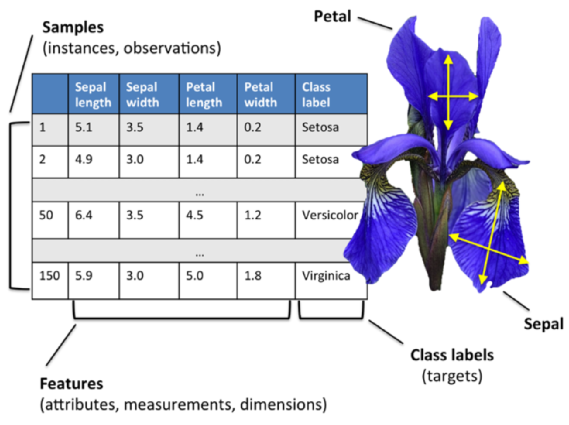

In [70]:
from IPython.display import Image
Image(filename ="imagens/iris-features.png", width=500, height=500)

** Separando os valores de dados e classes **

In [71]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [72]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

** Convertendo valores categórios de classe em numéricos **

In [73]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [74]:
y = y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

** Calculando a distância euclidiana para dois pontos **

<img src="imagens/euclidean-distance.png" width="300" height="300" align="left"/>

In [75]:
dist = DistanceMetric.get_metric('euclidean')
x = [[0, 1, 2]]
y = [[1.2, 1.1, 5.2]]
dist.pairwise(x,y)

array([[3.4190642]])

In [76]:
def calcula_distancia(x,c):
    dist = DistanceMetric.get_metric('euclidean')
    return dist.pairwise(x,c)

In [77]:
calcula_distancia(x,y)

array([[3.4190642]])

** Instânciando o Algoritmo K-means com 3 clusters **

In [78]:
kmeans = KMeans(n_clusters = 3, init = 'random')

** Executando o algoritmo K-means **

In [79]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** Verificando valores de centroids **

In [80]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

** Tabela de distância **

In [81]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 3.41925061, 5.0595416 ],
       [0.43816892, 3.39857426, 5.11494335],
       [0.41230086, 3.56935666, 5.27935534],
       [0.51883716, 3.42240962, 5.15358977],
       [0.19796969, 3.46726403, 5.10433388],
       [0.68380699, 3.14673162, 4.68148797],
       [0.41520116, 3.51650264, 5.21147652],
       [0.0599333 , 3.33654987, 5.00252706],
       [0.80099438, 3.57233779, 5.32798107],
       [0.36659514, 3.3583767 , 5.06790865],
       [0.48784424, 3.32449131, 4.89806763],
       [0.25138019, 3.31126872, 4.9966845 ],
       [0.49192682, 3.46661272, 5.19103612],
       [0.90906105, 3.90578362, 5.65173594],
       [1.02019214, 3.646649  , 5.10804455],
       [1.21309192, 3.49427881, 4.88564095],
       [0.66241377, 3.495248  , 5.03090587],
       [0.1509702 , 3.38444981, 5.02342022],
       [0.82848778, 3.11245944, 4.61792995],
       [0.39898872, 3.37738931, 4.97213426],
       [0.46172719, 3.07471224, 4.6955761 ],
       [0.33762701, 3.31506588, 4.9236821 ],
       [0.

In [82]:
distance[0]

array([0.14694217, 3.41925061, 5.0595416 ])

** Visualizando valores de distância para cada cluster **

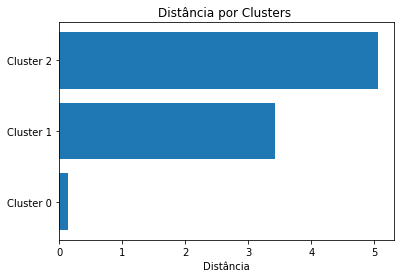

In [83]:
%matplotlib inline
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

** Imprimindo Rótulos **

In [84]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Visualizando os Centroids ##

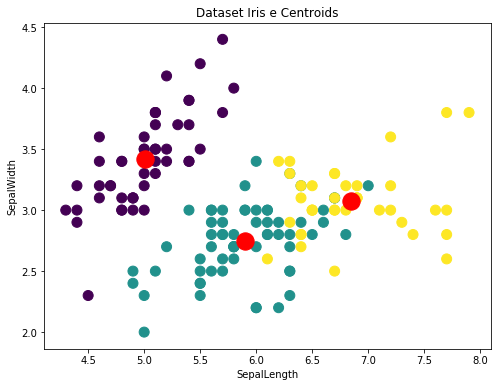

In [85]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

** Agrupando novos dados **

In [86]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([0, 2, 1])

** Visualizando os resultados **

AttributeError: 'list' object has no attribute 'shape'

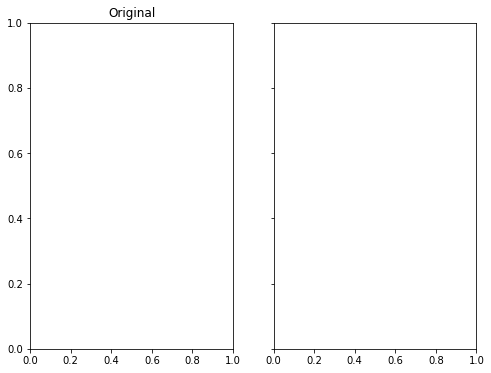

In [87]:
%matplotlib inline
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

** Estimando o valor do parametro K - Método Elbow **

1 680.8244
2 152.36870647733903
3 78.9450658259773
4 57.34492380952381
5 46.56163015873016
6 39.251830892636775
7 34.25476923565883
8 30.227724598930482
9 27.765424470266574
10 27.28333214928484


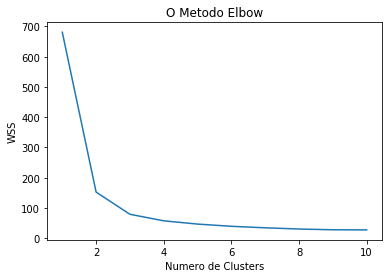

In [65]:
%matplotlib inline
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [66]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

ValueError: arrays must all be same length